In [3]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import os

In [4]:
# Custom Function, if required.
def create_str(file):
    """Transforms the contents of the file into a unique 
    string for iteration
    
    Arg: file: type(str).
    
    Returns: A string."""
    str_file = " ".join(i for i in file)
    return str_file

In [5]:
# Custom Function, if required.
def letter_frequency(string_file):
    """Takes a text file, or a string, splits
    the string, creates a dictionary and counts
    the frequency of words in the string.

    Then return the dictionary sorted.

    Arg: string_file: type(str): Receives a string.

    Returns: A dictionary sorted.

    """

    word_frequency = dict()
    letters = string_file.split()
    for w in letters:
        word_frequency[w] = word_frequency.get(w, 0) + 1

    sorted_count = dict()
    sorted_keys = sorted(word_frequency, key=word_frequency.get, reverse=True)
    for w in sorted_keys:
        sorted_count[w] = word_frequency[w]

    return sorted_count

In [6]:
# Custom Function, if required.
def remove_words():
    """Creates a list of words."""

    stopwords_list = list()
    while True:
        word = input("Enter a word: \nTo stop enter 0")
        if word == "0":
            break
        else:
            if word not in stopwords_list:
                stopwords_list.append(word)

    return print(stopwords_list)

In [9]:
# Importing the file
"""
For this Word cloud I'm using Project Gutenberg books.

The files are of type: Plain Text UTF-8
"""
path = requests.get("https://www.gutenberg.org/cache/epub/28885/pg28885.txt")
alice = path.text
#print(alice) # Just to check ;)

In [10]:
"""
In the wordcloud library, this method is responsible 
for removing unwanted words from the final view.

Like articles, adverbs and etc."""

stopwords = set(STOPWORDS)
stopwords.update(["said", "and", "of", "a", "it", "was", "gutenberg"])

# Simple Word Cloud.

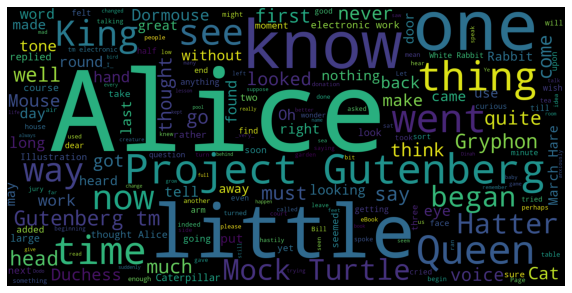

In [19]:
# This generates a simple word cloud.
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="black",
    width=1600, 
    height=800
).generate(alice)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("01. Alice Simple WordCloud.png") # store to file.

# Masked Word Cloud.

In [36]:
# This will genarate a masked word cloud.
alice_mask = np.array(Image.open("/content/alice_mask.png"))

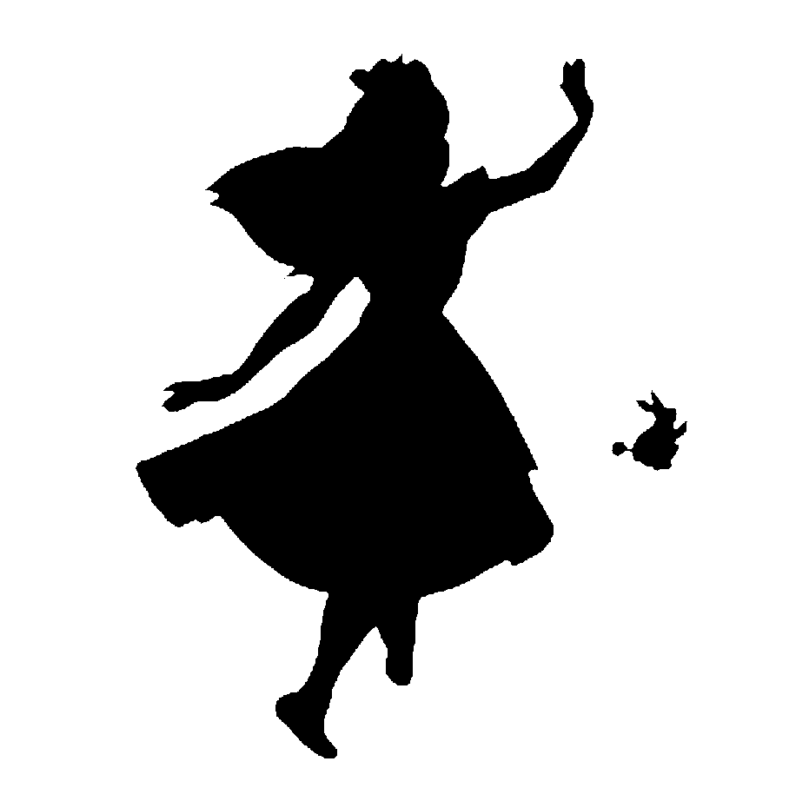

In [37]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

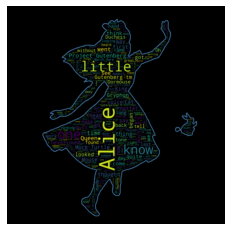

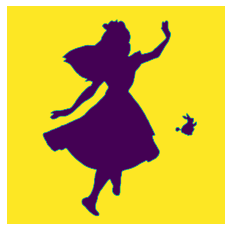

In [41]:
wc = WordCloud(
    stopwords=stopwords,
    background_color="black",
    max_words=2000,
    mask=alice_mask, 
    contour_width=3,
    contour_color='steelblue'
    )

wc.generate(alice)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
#fig.set_figwidth(14) # set width
#fig.set_figheight(18) # set height
plt.imshow(alice_mask, interpolation='bilinear')
plt.axis("off")

#plt.show()
wordcloud.to_file("02.maskedwordCloud.png") # store to file.

# Image-colored Word Cloud.

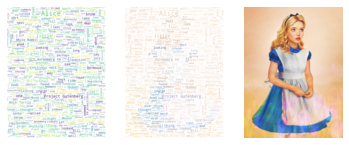

In [26]:
# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open("/content/alice_mask_colored.jpg"))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(
    background_color="white", 
    max_words=2000, 
    mask=alice_coloring,             
    stopwords=stopwords, 
    width=600, 
    height=800, 
    max_font_size=40, 
    random_state=42
    )

# generate word cloud
wc.generate(alice)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()